# D200, Problem Set 1: Introduction to PyTorch

Due: 5 Feb 2026 [here](https://classroom.github.com/a/kQo2Kl0l) in
groups of up to 2 (solo or one partner).

Stefan Bucher

This problem set introduces PyTorch, the deep learning framework we will
use throughout the course. You will learn to work with tensors, use
automatic differentiation, implement a training loop, and build a neural
network.

# Problem 1: Tensors and Automatic Differentiation

PyTorch tensors are similar to NumPy arrays but can run on GPUs and
support automatic differentiation. In this problem, you will explore
tensor operations and PyTorch’s autograd system.

**(1a)** Create the following tensors and perform the specified
operations:

1.  Create a tensor `a` containing the values \[1.0, 2.0, 3.0, 4.0,
    5.0\]
2.  Create a 3×3 tensor `B` filled with ones
3.  Reshape `a` to a 5×1 column vector
4.  Compute the element-wise square of `a`
5.  Compute the matrix product of `B` with itself

**(1b)** PyTorch’s automatic differentiation (autograd) computes
gradients automatically. Consider the function $f(x) = x^2 + 3x + 1$.

1.  Compute $\frac{df}{dx}$ analytically. What is its value at $x = 2$?
2.  Create a tensor `x = torch.tensor([2.0], requires_grad=True)` and
    compute `y = x**2 + 3*x + 1`
3.  Call `y.backward()` to compute the gradient, then print `x.grad`
4.  Verify that PyTorch’s gradient matches your analytical result

**(1c)** Consider the function $g(x, y) = x^2 y + y^3$.

1.  Compute $\frac{\partial g}{\partial x}$ and
    $\frac{\partial g}{\partial y}$ analytically
2.  Use PyTorch to compute both partial derivatives at $(x, y) = (1, 2)$
3.  Verify the results match

# Problem 2: Linear Regression in PyTorch

In this problem, you will implement linear regression using PyTorch’s
neural network modules and optimizers.

In [6]:
# Generate synthetic data for linear regression
n_samples = 100
true_weight = 3.5
true_bias = 1.2

X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

**(2a)** Visualize the data, then create a linear regression model using
`nn.Linear`. This module implements $\hat{y} = Wx + b$ where $W$
(weight) and $b$ (bias) are learnable parameters.

1.  Create a model: `model = nn.Linear(in_features=1, out_features=1)`
2.  Print the initial (random) weight and bias using `model.weight` and
    `model.bias`
3.  Make predictions on `X` using `model(X)` and plot them alongside the
    true data

**(2b)** Implement the training loop to fit the model. Use:

-   Loss function: `nn.MSELoss()`
-   Optimizer: `optim.SGD(model.parameters(), lr=0.1)`
-   Train for 100 epochs

The training loop should follow this pattern:

``` python
for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    # 2. Compute loss
    # 3. Zero gradients: optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    # 5. Update parameters: optimizer.step()
```

Store the loss at each epoch and plot the loss curve.

**(2c)** After training:

1.  Print the learned weight and bias
2.  Compute the analytical OLS solution:
    $\hat{\beta} = (X^\top X)^{-1} X^\top y$ (hint: add a column of ones
    for the intercept)
3.  Compare the SGD estimates to both the OLS solution and the true
    values (3.5 and 1.2)
4.  Plot the learned regression line alongside the data

**(2d)** Compare SGD with the Adam optimizer (`optim.Adam`). Retrain the
model with both optimizers and plot their loss curves. Which converges
faster?

# Problem 3: Multi-Layer Perceptron on MNIST

In this problem, you will build a multi-layer perceptron (MLP) to
classify handwritten digits from the MNIST dataset.

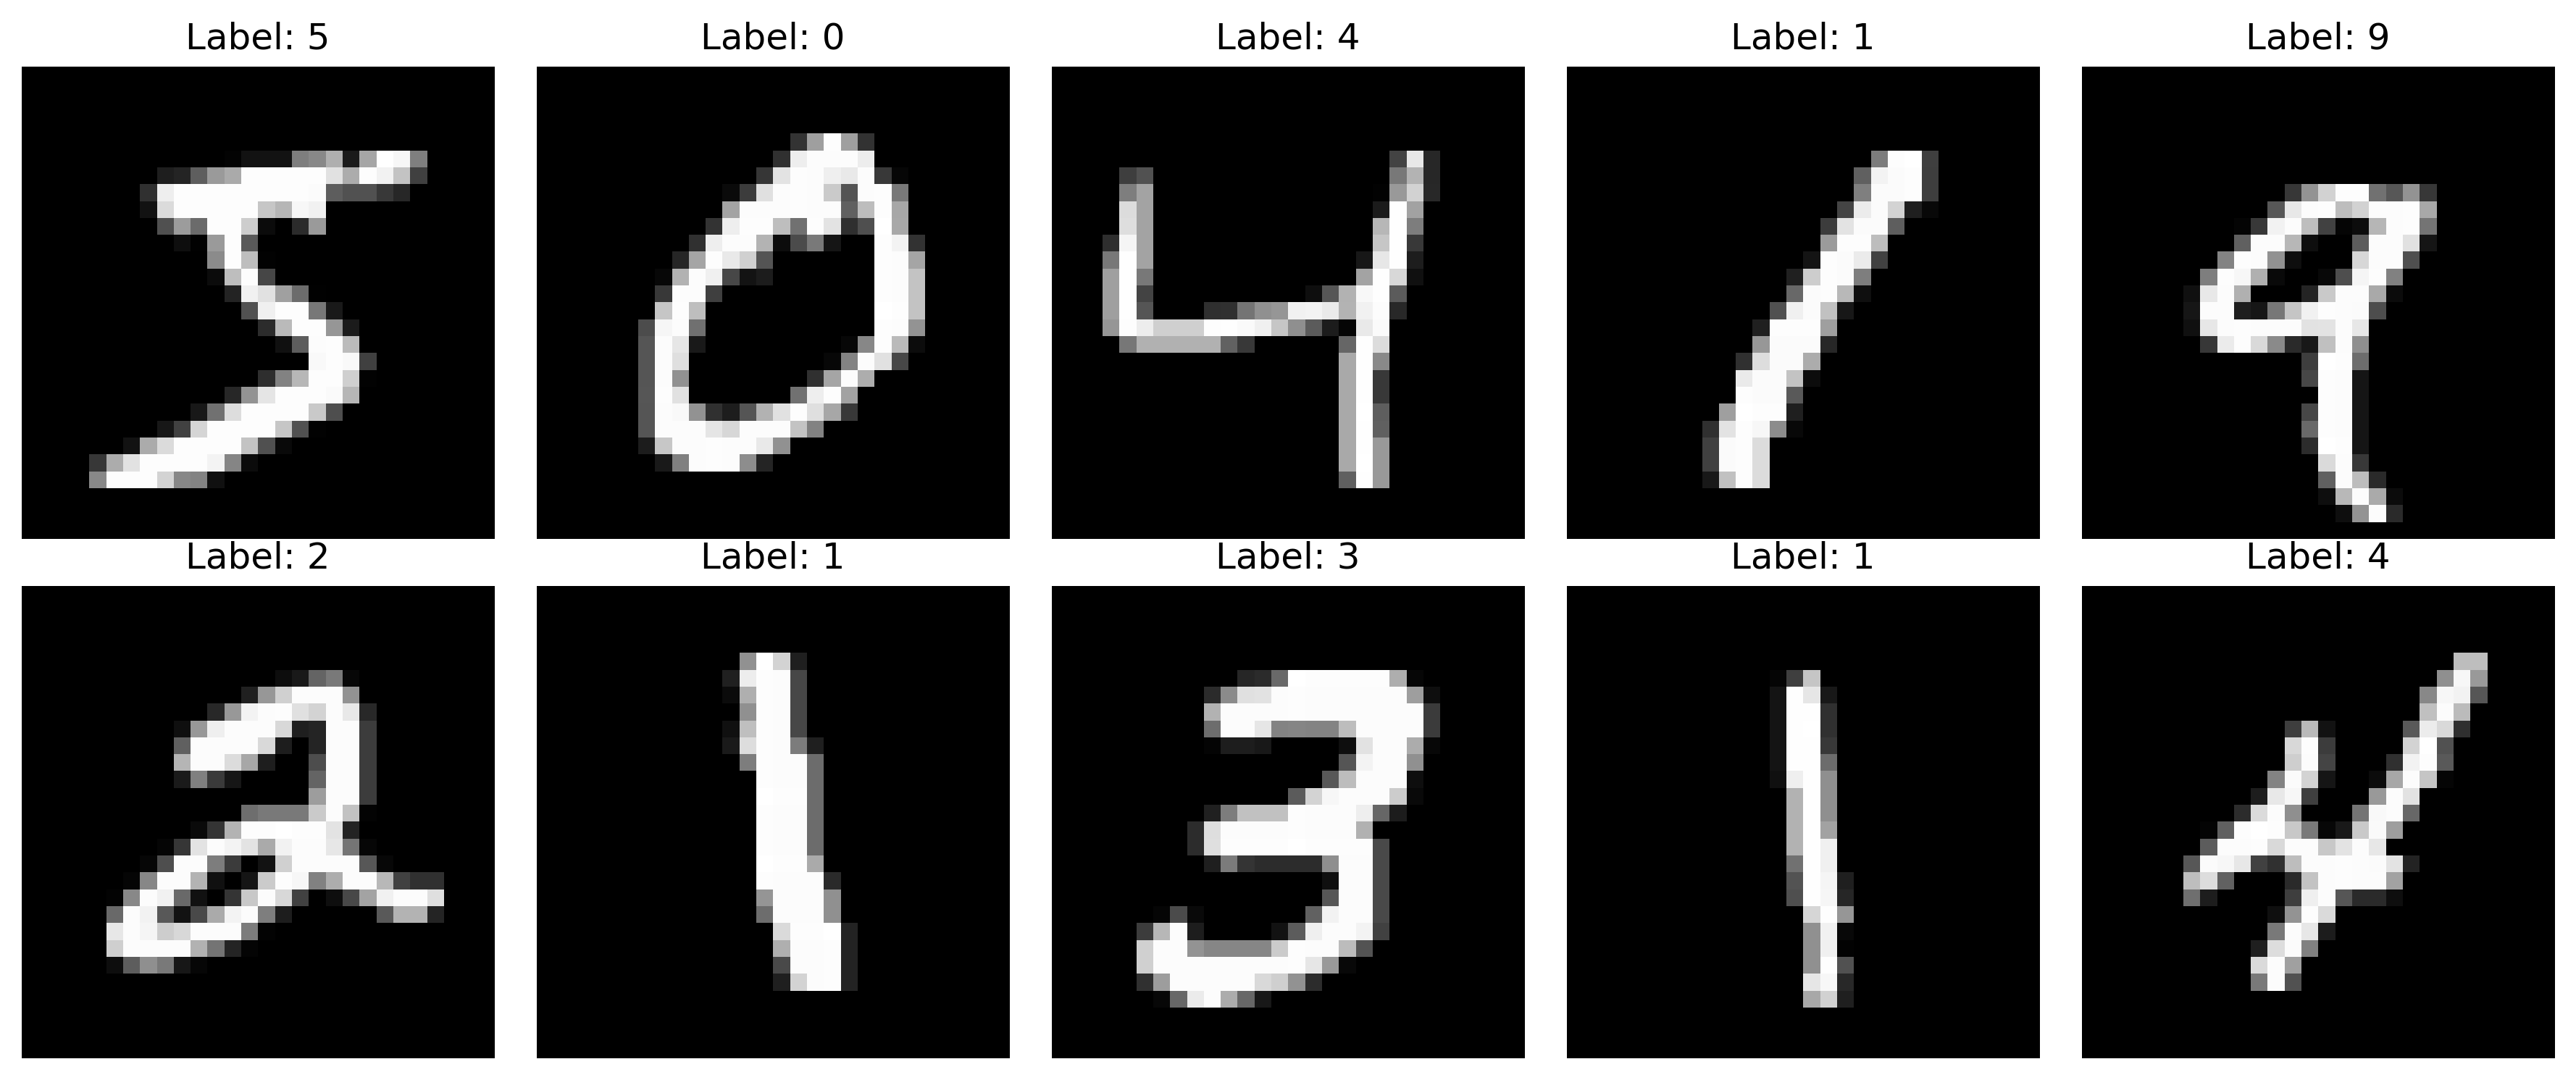

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

**(3a)** Build an MLP with the following architecture using
`nn.Sequential`:

-   Input: 784 features (28×28 flattened image)
-   Hidden layer 1: 256 units, ReLU activation
-   Hidden layer 2: 128 units, ReLU activation
-   Output: 10 units (one per digit class)

Print the model architecture and count the total number of parameters.

**(3b)** Train the model:

-   Loss function: `nn.CrossEntropyLoss()` (combines softmax and
    negative log-likelihood)
-   Optimizer: `optim.Adam(model.parameters(), lr=0.001)`
-   Train for 5 epochs

For each epoch, compute and print:

1.  Average training loss
2.  Training accuracy
3.  Test accuracy

Use this helper function to compute accuracy:

In [13]:
def compute_accuracy(model, data_loader):
    model.eval()  # Sets evaluation mode (disables dropout/batchnorm training behavior)
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

**(3c)** Evaluate and visualize:

1.  Plot the training loss and accuracies over epochs
2.  Display 10 test images with their predicted labels. Mark incorrect
    predictions in red.
3.  What test accuracy did you achieve? How does this compare to random
    guessing (10%)?